# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

# Loading the model predictions

In [10]:
models = ['MVLR', 'DNN', 'LSTM', 'GRU', 'CNN'] # specify the model names

dfs = []
for model in models:
    df = pd.read_csv('models\\'+model+'_predictions.csv', parse_dates=['datetime'])
    df = df.set_index(['datetime']) 
    df.columns = ['y_pred_'+model, 'y_true_'+model] # change columns to contain the model name
    dfs.append(df)

df = pd.concat(dfs) # Concatenate the list of DataFrames together to one DataFrame

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


# Processing the predictions

In [11]:
df.head()

,y_pred_CNN,y_pred_DNN,y_pred_GRU,y_pred_LSTM,y_pred_MVLR,y_true_CNN,y_true_DNN,y_true_GRU,y_true_LSTM,y_true_MVLR
datetime,,,,,,,,,,
2017-09-11 10:00:00,NaN,NaN,NaN,NaN,0.607487,NaN,NaN,NaN,NaN,0.392012
2017-09-11 11:00:00,NaN,NaN,NaN,NaN,0.516667,NaN,NaN,NaN,NaN,0.340798
2017-09-11 12:00:00,NaN,NaN,NaN,NaN,0.573307,NaN,NaN,NaN,NaN,0.301736
2017-09-11 13:00:00,NaN,NaN,NaN,NaN,0.565495,NaN,NaN,NaN,NaN,0.403931
2017-09-11 14:00:00,NaN,NaN,NaN,NaN,0.360417,NaN,NaN,NaN,NaN,0.228943


In [12]:
# Calculate the difference between the y_true and y_pred per model
for model in models:
    df['y_diff_'+model] = df['y_true_'+model] - df['y_pred_'+model]
    df['y_diff_perc_'+model] = df['y_diff_'+model] / df['y_true_'+model] * 100
 
df.head()

,y_pred_CNN,y_pred_DNN,y_pred_GRU,y_pred_LSTM,y_pred_MVLR,y_true_CNN,y_true_DNN,y_true_GRU,y_true_LSTM,y_true_MVLR,y_diff_MVLR,y_diff_perc_MVLR,y_diff_DNN,y_diff_perc_DNN,y_diff_LSTM,y_diff_perc_LSTM,y_diff_GRU,y_diff_perc_GRU,y_diff_CNN,y_diff_perc_CNN
datetime,,,,,,,,,,,,,,,,,,,,
2017-09-11 10:00:00,NaN,NaN,NaN,NaN,0.607487,NaN,NaN,NaN,NaN,0.392012,-0.215475,-54.966405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 11:00:00,NaN,NaN,NaN,NaN,0.516667,NaN,NaN,NaN,NaN,0.340798,-0.175869,-51.604957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 12:00:00,NaN,NaN,NaN,NaN,0.573307,NaN,NaN,NaN,NaN,0.301736,-0.271572,-90.003245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 13:00:00,NaN,NaN,NaN,NaN,0.565495,NaN,NaN,NaN,NaN,0.403931,-0.161564,-39.998029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-11 14:00:00,NaN,NaN,NaN,NaN,0.360417,NaN,NaN,NaN,NaN,0.228943,-0.131474,-57.426541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.resample('D').sum()

# Plotting the predictions

# Predictions vs the real values

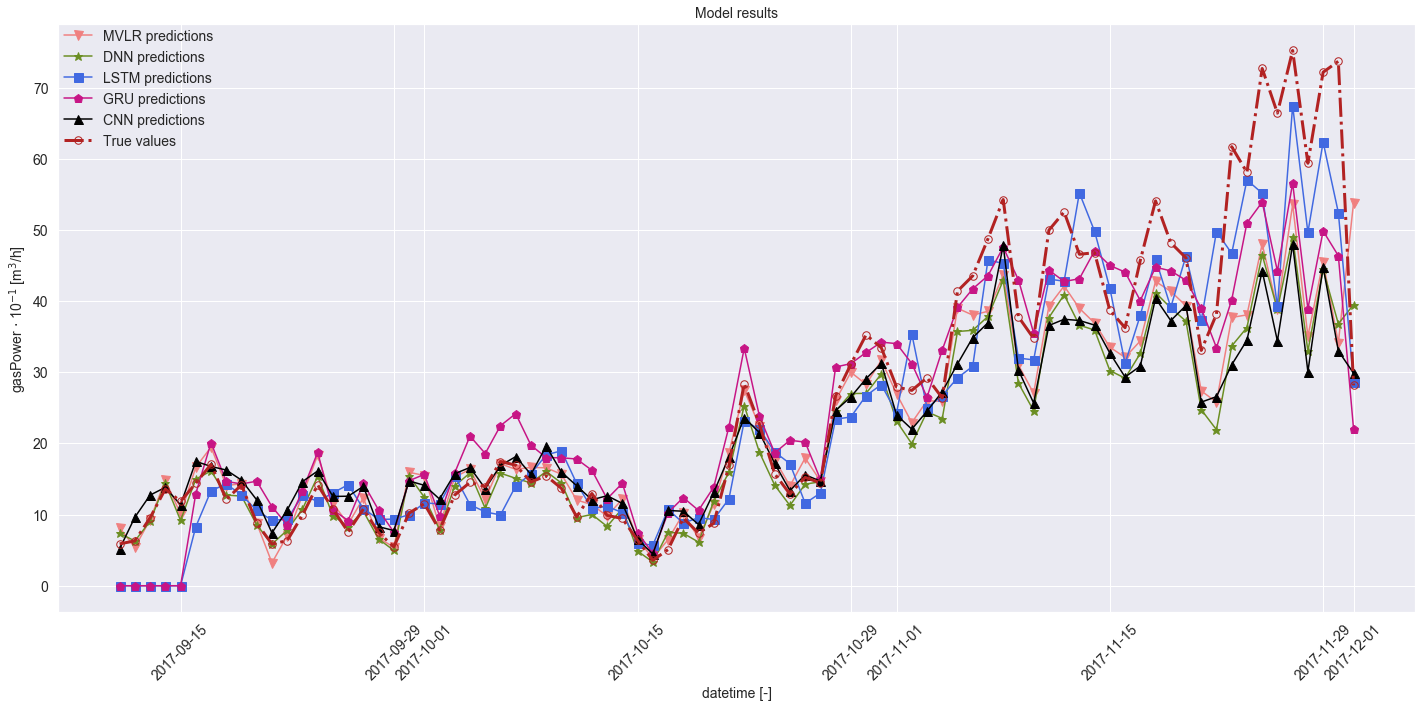

In [14]:
magnitude = 1

model = 'DNN'

y_true = df['y_true_DNN']

plt.figure(figsize=(20,10))

# TODO: Fix this
#df['zeros'] = 0
#plt.fill_between(y_true.index, y_true, df['zeros'], '.-', color='red')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_pred_'+model]
    plt.plot(y_pred.index, y_pred, marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.plot(y_true.index, y_true, '.-.', color='firebrick', label='True values', alpha=1, linewidth=3, markersize=15, fillstyle='none')

plt.ylabel(r'gasPower $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.title('Model results', fontsize=14)

plt.tight_layout()

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)

# Difference between predictions and true values
Lower is better.

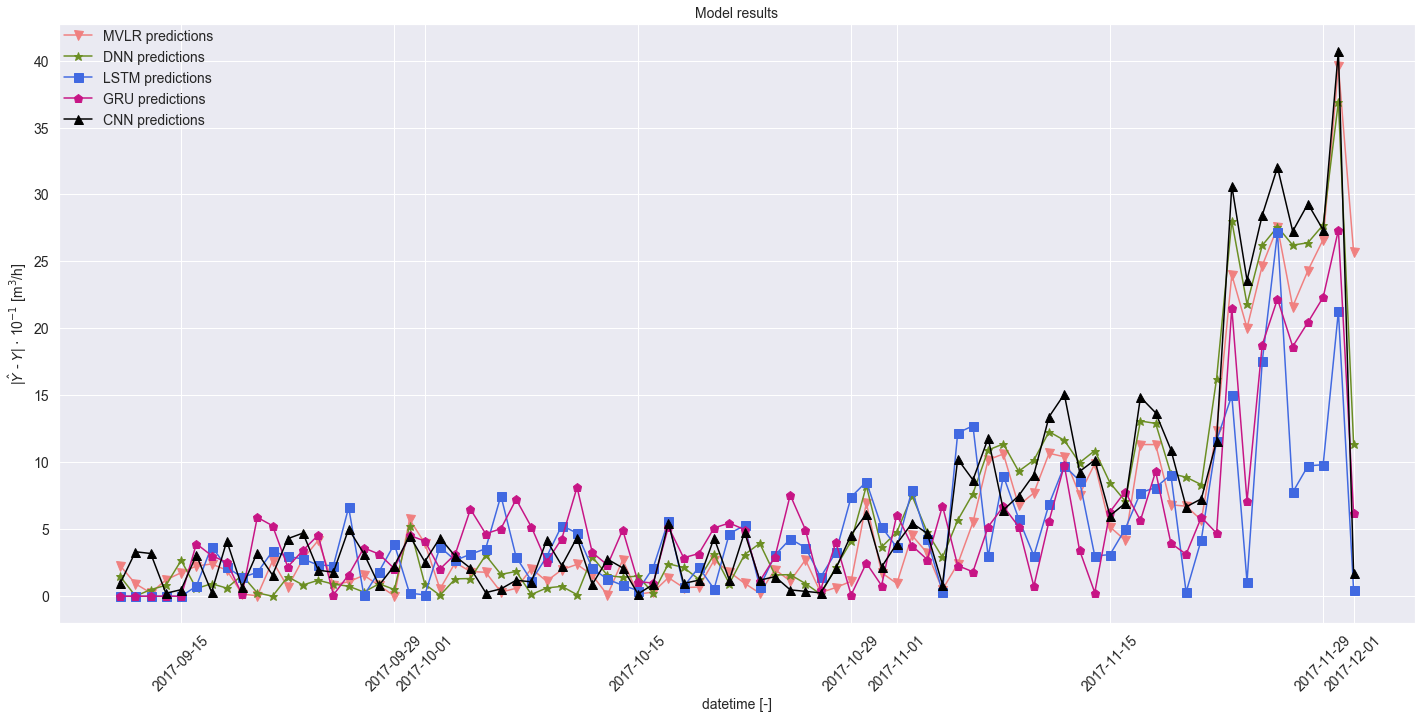

In [15]:
magnitude = 1

model = 'DNN'

#y_true = t['y_diff_DNN']

plt.figure(figsize=(20,10))

#plt.plot(y_true.index, y_true, '.-', color='red', label='True values', alpha=1, linewidth=1, markersize=15, fillstyle='none')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_diff_'+model]
    plt.plot(y_pred.index, np.abs(y_pred), marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.ylabel(r'|$\hat{Y}$ - $Y$| $\cdot$ 10$^{-%s}$ [m$^3$/h]' % magnitude, fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.title('Model results', fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)

# Percentage difference

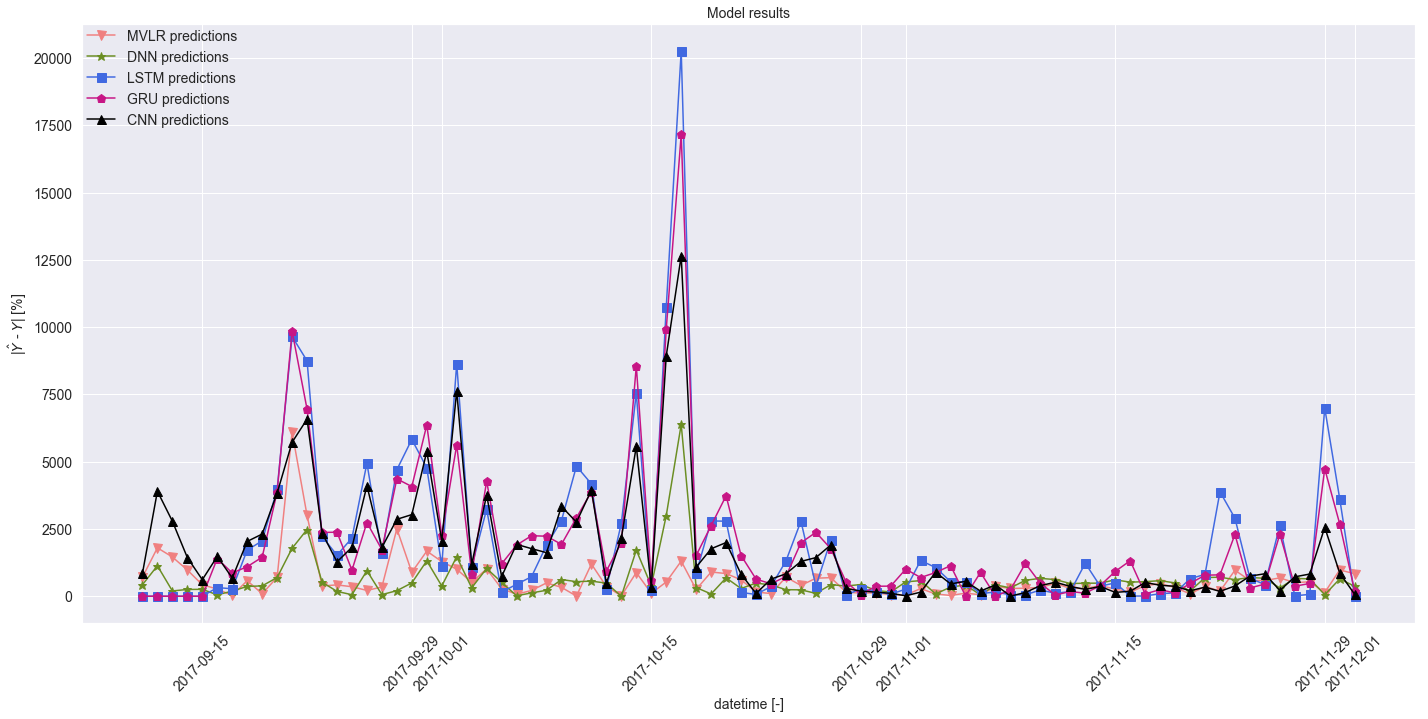

In [18]:
magnitude = 1

model = 'DNN'

#y_true = t['y_diff_DNN']

plt.figure(figsize=(20,10))

#plt.plot(y_true.index, y_true, '.-', color='red', label='True values', alpha=1, linewidth=1, markersize=15, fillstyle='none')

for i, model in enumerate(models):
    colors = ['lightcoral', 'olivedrab', 'royalblue', 'mediumvioletred', 'black']
    markers = ['v', '*', 's', 'p', '^']
    
    color = colors[i]
    marker = markers[i]
    y_pred = df['y_diff_perc_'+model]
    plt.plot(y_pred.index, np.abs(y_pred), marker+'-', color=color, label=(model+' predictions'), alpha=1, markersize=9)


plt.ylabel(r'|$\hat{Y}$ - $Y$| [%]', fontsize=14)
plt.xlabel('datetime [-]', fontsize=14) #TODO: set x values as actual dates

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.title('Model results', fontsize=14)

plt.legend(loc='upper left', borderaxespad=0, frameon=False, fontsize=14, markerscale=1)